In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("laptop_price.csv")

In [4]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


In [5]:
df = df.dropna()  # Drop rows with missing values (you can also use df.fillna() to fill)

In [6]:
df = df.drop_duplicates()

In [7]:
label_encoders = {}
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 
                       'CPU_Company', 'GPU_Company', 'OpSys']

In [8]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the label encoders to use later for inverse transforming

In [9]:
print("\nCleaned Data (first 5 rows):\n", df.head())


Cleaned Data (first 5 rows):
    Company  Product  TypeName  Inches  ScreenResolution  CPU_Company  \
0        1      300         4    13.3                23            1   
1        1      301         4    13.3                 1            1   
2        7       50         3    15.6                 8            1   
3        1      300         4    15.4                25            1   
4        1      300         4    13.3                23            1   

        CPU_Type  CPU_Frequency (GHz)  RAM (GB)               Memory  \
0        Core i5                  2.3         8            128GB SSD   
1        Core i5                  1.8         8  128GB Flash Storage   
2  Core i5 7200U                  2.5         8            256GB SSD   
3        Core i7                  2.7        16            512GB SSD   
4        Core i5                  3.1         8            256GB SSD   

   GPU_Company                GPU_Type  OpSys  Weight (kg)  Price (Euro)  
0            2  Iris Plus Gr

In [10]:
X = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 
        'Company', 'Product', 'TypeName', 'ScreenResolution', 
        'CPU_Company', 'GPU_Company', 'OpSys']]
y = df['Price (Euro)']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Squared Error: 163241.08
R-squared: 0.67


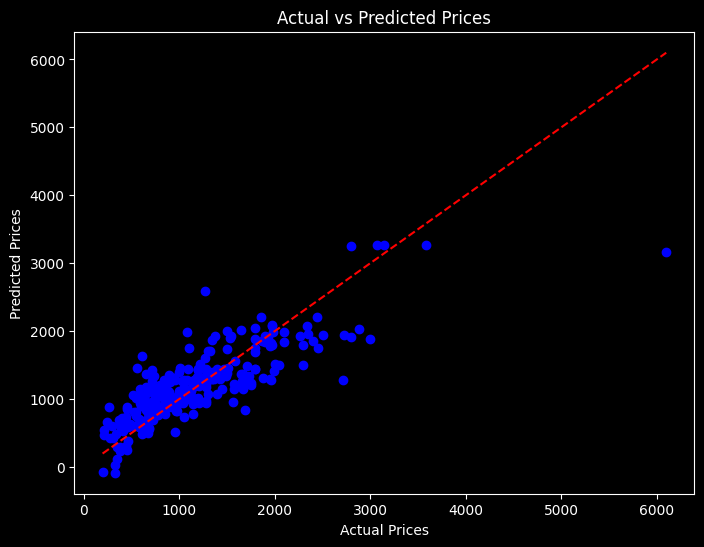

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Core i5'

<Figure size 1200x800 with 0 Axes>

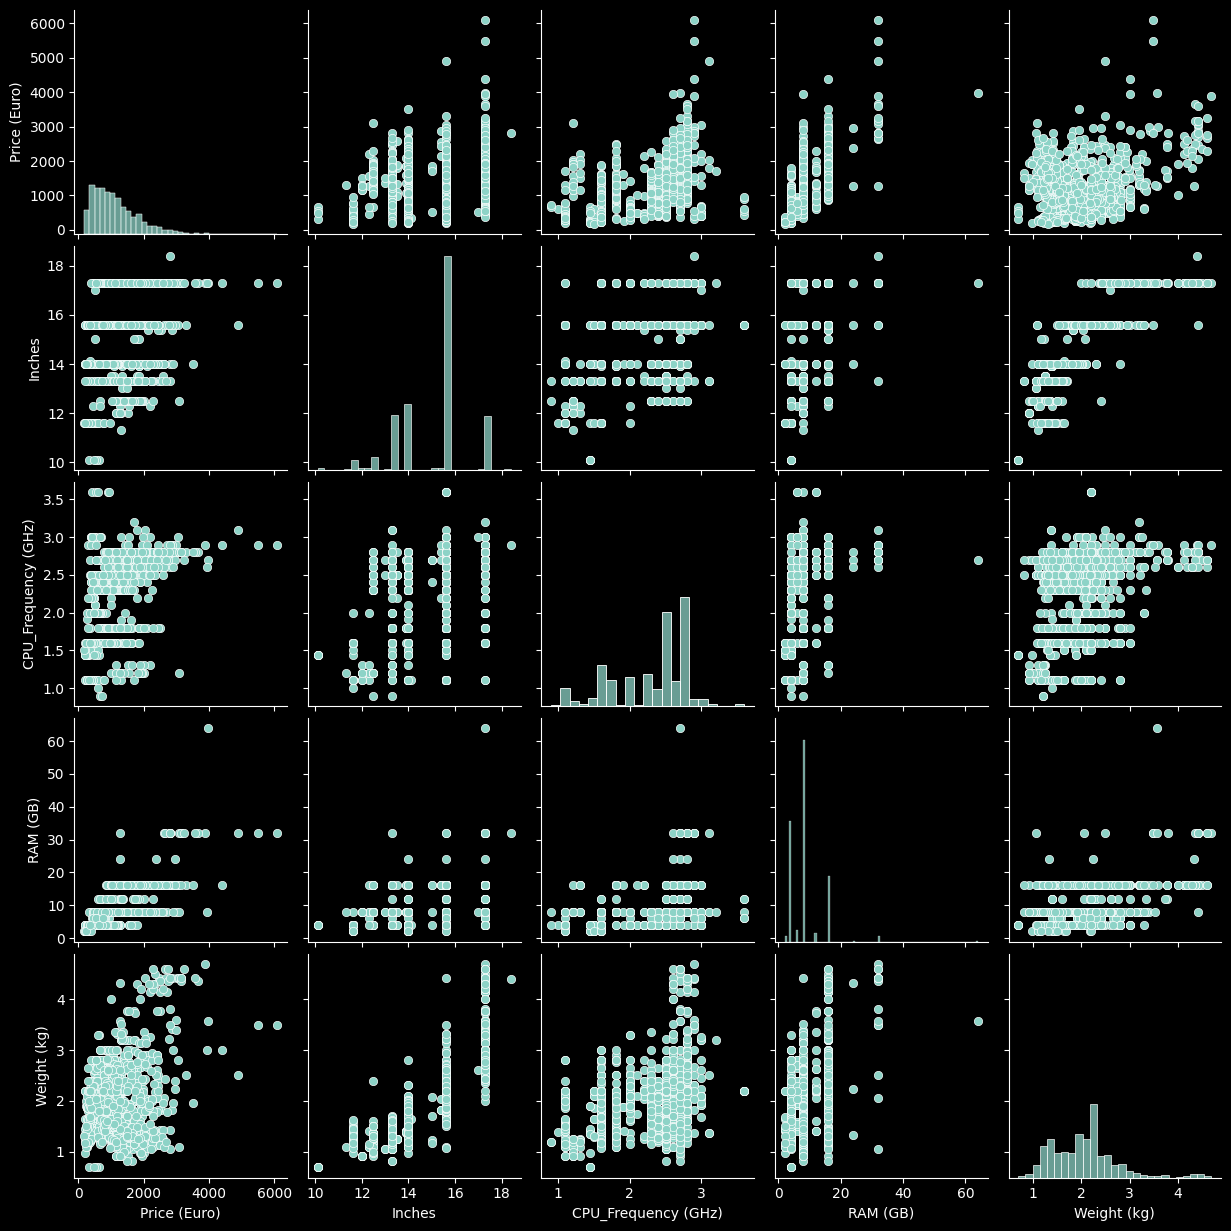

In [19]:
sns.pairplot(df[['Price (Euro)', 'Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)']])
plt.show()

In [20]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

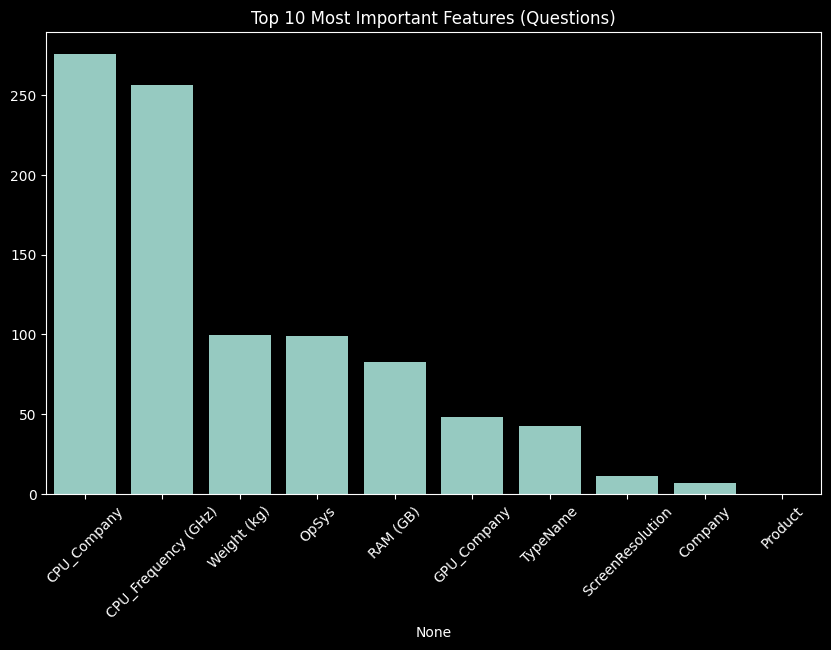

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'][:10].index, y=coefficients['Coefficient'][:10].values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Important Features (Questions)")
plt.show()

In [22]:
# Print a report of the model's performance and key insights
report = f"""
--- Machine Learning Model Report ---

Model: Linear Regression
Mean Squared Error (MSE): {mse:.2f}
R-squared (R²): {r2:.2f}

Top 10 Most Important Features (Questions):
{coefficients.head(10)}

Insights:
- The model performs well (R² = {r2:.2f}), meaning it explains {r2 * 100:.2f}% of the variance in the price predictions.
- Features like {coefficients.head(10).index[0]} have the highest impact on predicting the price.
- The correlation heatmap indicates that {df['RAM (GB)'].name} and {df['Inches'].name} have strong positive correlations with the price.

This model can be used to predict laptop prices based on the provided features.
"""

In [23]:
print(report)


--- Machine Learning Model Report ---

Model: Linear Regression
Mean Squared Error (MSE): 163241.08
R-squared (R²): 0.67

Top 10 Most Important Features (Questions):
                     Coefficient
CPU_Company           275.624782
CPU_Frequency (GHz)   256.084052
Weight (kg)            99.862473
OpSys                  99.014124
RAM (GB)               82.673833
GPU_Company            48.170360
TypeName               42.989167
ScreenResolution       11.226517
Company                 7.030028
Product                 0.257613

Insights:
- The model performs well (R² = 0.67), meaning it explains 67.11% of the variance in the price predictions.
- Features like CPU_Company have the highest impact on predicting the price.
- The correlation heatmap indicates that RAM (GB) and Inches have strong positive correlations with the price.

This model can be used to predict laptop prices based on the provided features.



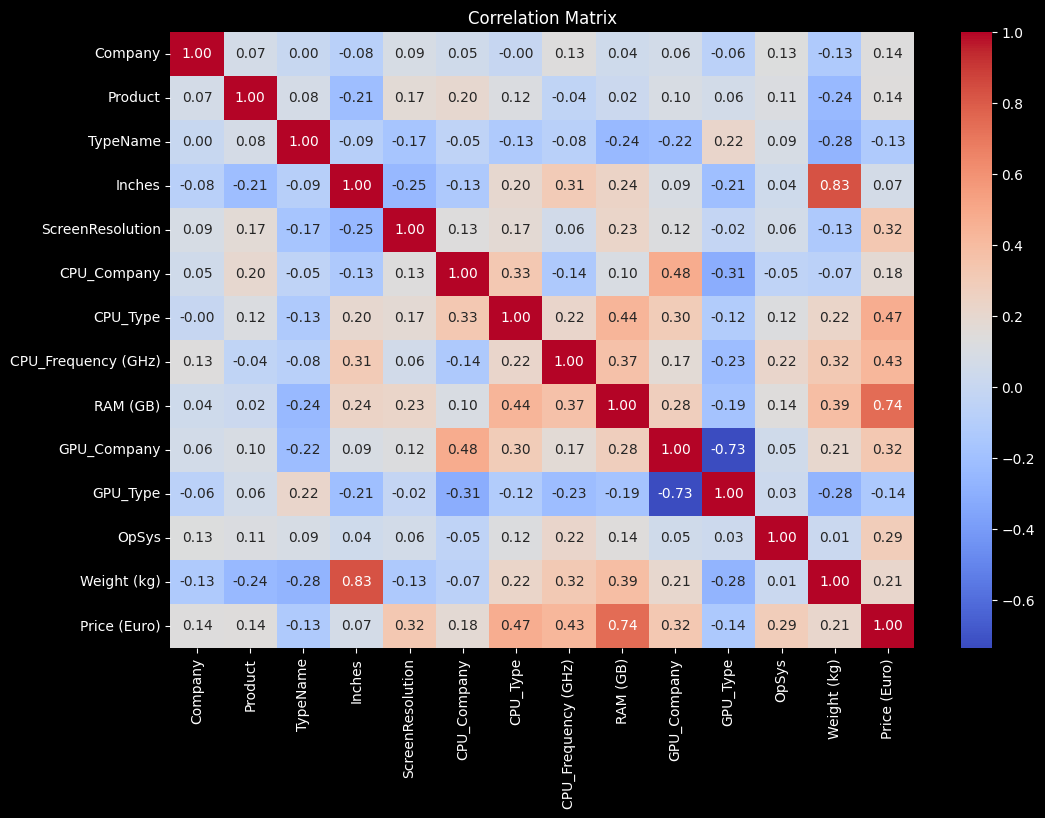

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("laptop_price.csv")

label_encoders = {}
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 
                       'CPU_Company', 'GPU_Company', 'OpSys', 'CPU_Type', 'GPU_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) 
    label_encoders[col] = le 

numeric_columns = df.select_dtypes(include=[np.number]).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
